# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [121]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats

In [102]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [103]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\robin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


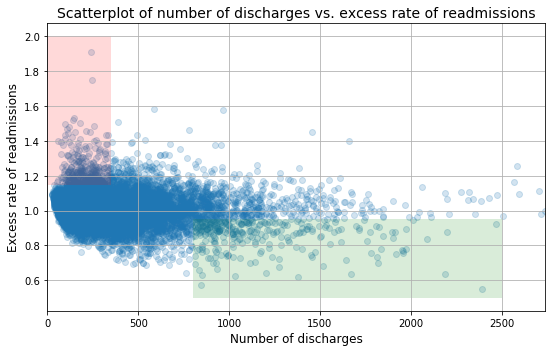

In [104]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [105]:
# Your turn

# A.

The analysis and recommendations above seem reasonable. A more in-depth statistical analysis shows there is a correlation between number of discharges and excess readmission rate. The mean excess readmission rate from two samples, one of hospitals with less than 100 discharges and one of hospitals with more than 1000 discharges show they are statistically significant. However, we should always caution that correlation does not always equal causation, and confounding factors should be considered. Not all small hospitals have a higher readmission rates, so the recommendation should not be a blanket to cover all small hospitals with under 300 discharges. Also, the excess readmission rate is based on the predicted readmissions. How good are the predictions?

# B.  
1.2.3. Hypothesis tests, p-values, and statistical significance of 0.01

First, let's explore the correlation between discarges and readmissions. Adding a linear regression line to the scatter plot we can see that it is indeed sloping down. The pearson correlation coefficient is -0.093, which seems a little on the low end.

pearson correlation coefficient = -0.09309554287590442


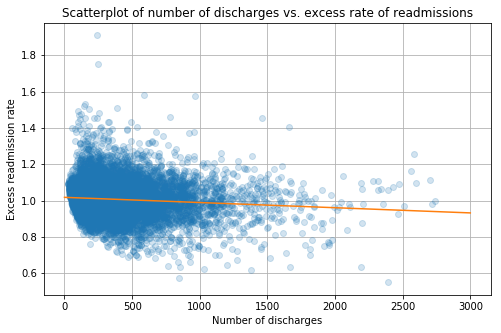

In [106]:
# compute linear regression line
a, b = np.polyfit(x, y, 1)
reg_x = np.array([0,3000])

# scatter plot with linear regression line
plt.figure(figsize=(8,5))
plt.grid()
plt.xlabel('Number of discharges')
plt.ylabel('Excess readmission rate')
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions')
plt.plot(x, y, marker='o', linestyle='none', alpha=0.2)
plt.plot(reg_x, a * reg_x + b, linewidth=1.5)

# compute pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

r = pearson_r(x, y)
print('pearson correlation coefficient =', r)

Is this pearson value by random chance? The first hypothesis test will test this. The null hypothesis is that the pearson correlation is zero with a significance value of 0.01.

In [107]:
# bootstrap hypothesis test of the pearson
# keeping y the same, permutate x to see new pearsons

perm_reps = np.empty(1000)

for i in range(1000):
    x_perm = np.random.permutation(x)
    
    perm_reps[i] = pearson_r(x_perm, y)
    
p = np.sum(perm_reps < r) / len(perm_reps)
print('p-value =', p)

p-value = 0.0


The p-value does indicate that the original pearson correlation coefficient value is statistically significant

Next, let's test the hypothesis that the two samples of hospitals with < 100 discharges and hospitals with > 1000 discharges have the same mean as the entire population with a significance level of 0.01. The alternative is that the means are different. This will be done using frequentist statistics.

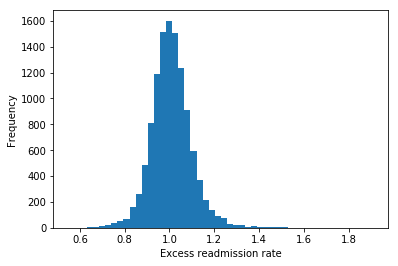

In [108]:
# checking normality
df = pd.DataFrame({'discharges': x, 'excess': y})
_ = plt.hist(df.excess, bins=50)
_ = plt.xlabel('Excess readmission rate')
_ = plt.ylabel('Frequency')

In [109]:
# create the two samples along with the total population
lo_dis = np.array(df[df.discharges < 100].excess)
hi_dis = np.array(df[df.discharges > 1000].excess)
tot_pop = np.array(df.excess)

#get means and stds
lo_dis_mean = np.mean(lo_dis)
hi_dis_mean = np.mean(hi_dis)
tot_pop_mean = np.mean(tot_pop)
lo_dis_std = np.std(lo_dis)
hi_dis_std = np.std(hi_dis)
tot_pop_std = np.std(tot_pop)

#calculate z statistics
hi_dis_z = (hi_dis_mean - tot_pop_mean) / (tot_pop_std / np.sqrt(len(hi_dis)))
lo_dis_z = (lo_dis_mean - tot_pop_mean) / (tot_pop_std / np.sqrt(len(lo_dis)))

#calculate p-values
p_value_hi = stats.norm.sf(abs(hi_dis_z))
p_value_lo = stats.norm.sf(abs(lo_dis_z))

print('p-value of high discharge hospitals having the same mean as the population:', p_value_hi)
print('p-value of low discharge hospitals having the same mean as the population:', p_value_lo)

p-value of high discharge hospitals having the same mean as the population: 1.533885424442663e-11
p-value of low discharge hospitals having the same mean as the population: 7.820911485638733e-09


From the both p-values, we can reject the null hypothesis and claim the difference in means of the two samples are statistically significant

Next, we can compare the two samples with a bootstrap. The null hypothesis is that the mean of the two samples are the same. The alternative is that they are not.

In [110]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute mean of all forces: mean_force
mean_excess = np.mean(np.concatenate((lo_dis, hi_dis)))

# Generate shifted arrays
lo_dis_shifted = lo_dis - lo_dis_mean + mean_excess
hi_dis_shifted = hi_dis - hi_dis_mean + mean_excess

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_lo = draw_bs_reps(lo_dis_shifted, np.mean, 10000)
bs_replicates_hi = draw_bs_reps(hi_dis_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_lo - bs_replicates_hi

# Compute and print p-value: p
p = np.sum(bs_replicates >= (lo_dis_mean - hi_dis_mean)) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0


The p-value indicates we can reject the null hypothesis and claim the differences in mean excess readmission rates are statistically significant.

# B.  

4. While some conclusions are statistically significant, they may not be practically significant. For example, in this case, it may be statistically significant that smaller hospitals have higher excess readmission rates, but there may be pratical reasons for that. Small hospitals serve different patient populations. Upgrading resource allocation may not be practical at small volumes as some resources might only be cost viable at scale. Consolidating hospitals may not be practical in a community where there is only one hospital. It may be unfair to small hospitals to make these recommendations based on a single factor. I would advise to study more factors before making recommendations. And finally, look a absolute values as well as relative values, you might be incurring costs for very little value.

5. The scatter plot above shows the general trend and correlation between number of discharges and excess readmission rates. The advantages are that it shows all the data from a big picture perspective, and the user can see general trends. The disadvantage is that it doesn't show directly and specifically the difference between small and large hospitals. To show the difference more directly, the box plot below compares the small hospitals and large hospitals with means and outliers.

Text(0.5, 1.0, 'Comparison of excess readmissions between small and large hospitals')

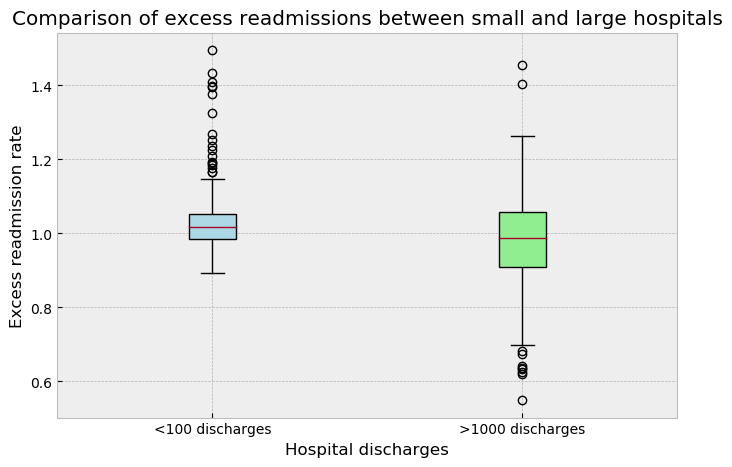

In [133]:
mpl.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,5))
bplot = ax.boxplot([lo_dis, hi_dis], labels=['<100 discharges', '>1000 discharges'], patch_artist=True)
colors = ['lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax.grid(True)
ax.set_xlabel('Hospital discharges')
ax.set_ylabel('Excess readmission rate')
ax.set_title('Comparison of excess readmissions between small and large hospitals')